In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('test.csv', index_col=0)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
data.shape

(1459, 79)

In [4]:
data[[col for col in data.columns if data[col].isnull().sum()!=0]].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

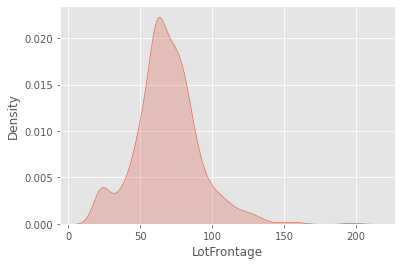

In [5]:
sns.kdeplot(data['LotFrontage'], fill=True)

In [6]:
data['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [7]:
#MSSubClass, Neighborhood, 3SsnPorch, LotArea

In [8]:
import joblib

imp = joblib.load('saved_model.pkl')

In [9]:
test = data[['MSSubClass', 'Neighborhood', '3SsnPorch', 'LotArea']][data['LotFrontage'].isnull()]

In [10]:
test

,MSSubClass,Neighborhood,3SsnPorch,LotArea
Id,,,,
1467,20,Gilbert,0,7980
1501,160,Somerst,0,2980
1502,160,Somerst,0,2403
1506,20,NWAmes,0,10456
1508,50,NWAmes,0,18837
...,...,...,...,...
2848,20,CollgCr,0,11088
2851,60,CollgCr,0,21533
2901,20,Timber,0,50102


In [11]:
#Check if the distribution of the explanatory features match from train file.
#Check if they affect LotFrontage in the same way as in train file.

In [12]:
freq_test = test.groupby('Neighborhood').size() / len(test)
test.loc[:, 'Neighborhood'] = test['Neighborhood'].map(freq_test)

test

,MSSubClass,Neighborhood,3SsnPorch,LotArea
Id,,,,
1467,20,0.105727,0,7980
1501,160,0.052863,0,2980
1502,160,0.052863,0,2403
1506,20,0.079295,0,10456
1508,50,0.079295,0,18837
...,...,...,...,...
2848,20,0.101322,0,11088
2851,60,0.101322,0,21533
2901,20,0.030837,0,50102


In [13]:
impu_val = imp.predict(test)

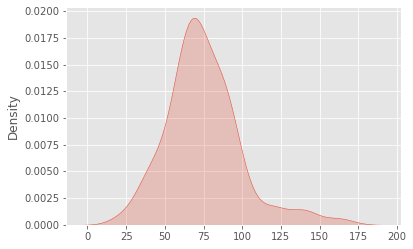

In [14]:
sns.kdeplot(impu_val, fill=True)

In [15]:
data['LotFrontage'][data['LotFrontage'].isnull()] = impu_val.copy()

In [16]:
data['Alley'].fillna('No Alley', inplace=True)

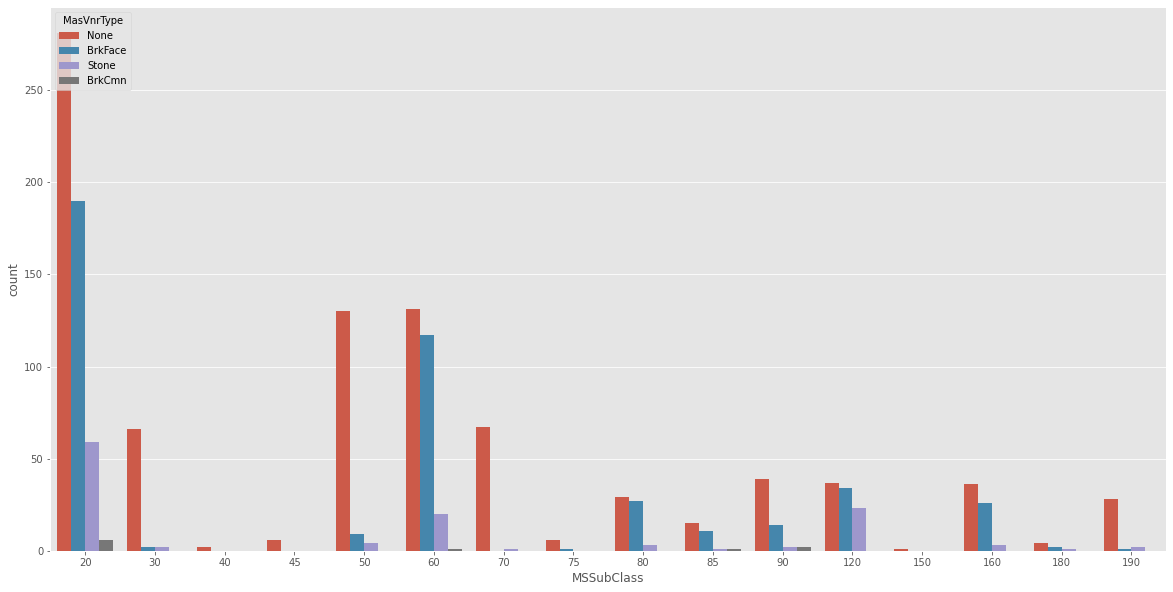

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(data['MSSubClass'], hue=data['MasVnrType'])

In [18]:
data.groupby(['MSSubClass', 'MasVnrType']).size()

MSSubClass  MasVnrType
20          BrkCmn          6
            BrkFace       190
            None          281
            Stone          59
30          BrkFace         2
            None           66
            Stone           2
40          None            2
45          None            6
50          BrkFace         9
            None          130
            Stone           4
60          BrkCmn          1
            BrkFace       117
            None          131
            Stone          20
70          None           67
            Stone           1
75          BrkFace         1
            None            6
80          BrkFace        27
            None           29
            Stone           3
85          BrkCmn          1
            BrkFace        11
            None           15
            Stone           1
90          BrkCmn          2
            BrkFace        14
            None           39
            Stone           2
120         BrkFace        34
            None 

In [19]:
data[['MSSubClass', 'MasVnrType']][data['MasVnrType'].isnull()]

,MSSubClass,MasVnrType
Id,,
1692,60,NaN
1707,20,NaN
1883,60,NaN
1993,60,NaN
2005,20,NaN
2042,60,NaN
2312,60,NaN
2326,80,NaN
2341,20,NaN


In [20]:
data['MasVnrType'][data['MasVnrType'].isnull()] = \
['None', 'None', 'None', 'None', 'BrkFace', 'BrkFace', 'BrkFace', 'None', 'None', 'None', 'None', 'BrkFace', 'Stone',\
'BrkFace', 'None', 'BrkFace']

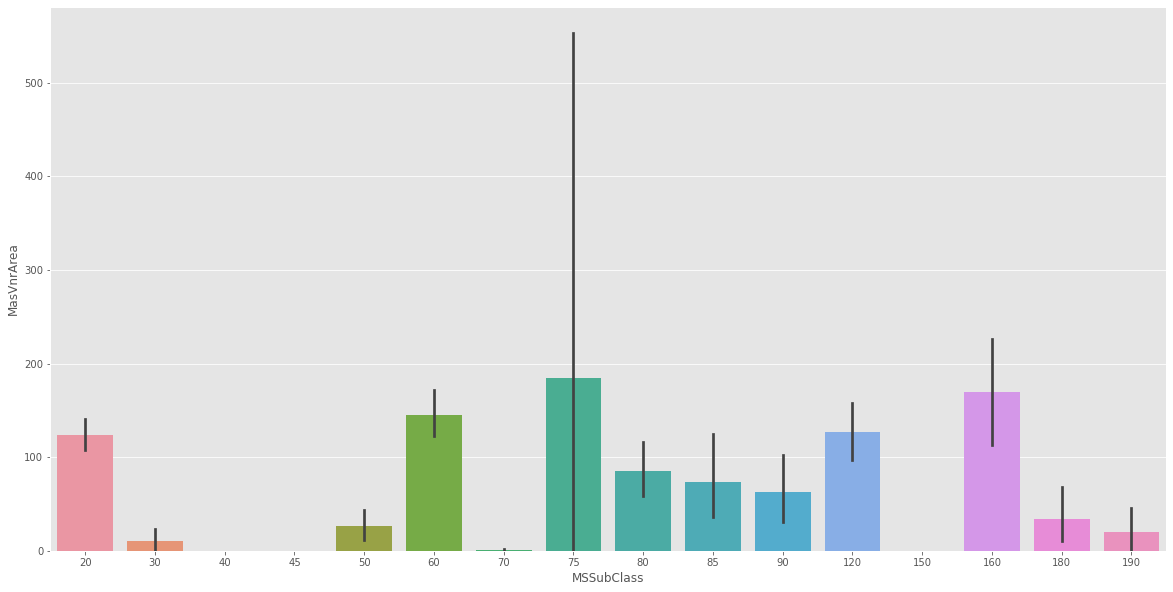

In [21]:
plt.figure(figsize=(20, 10))
sns.barplot(data['MSSubClass'], data['MasVnrArea'])

In [22]:
data[['MSSubClass', 'MasVnrArea']][data['MasVnrArea'].isnull()]

,MSSubClass,MasVnrArea
Id,,
1692,60,NaN
1707,20,NaN
1883,60,NaN
1993,60,NaN
2005,20,NaN
2042,60,NaN
2312,60,NaN
2326,80,NaN
2341,20,NaN


In [23]:
data['MasVnrArea'][data['MasVnrArea'].isnull()] = [data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==80].mean(),        
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==120].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean()]

In [24]:
'''BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2'''

'BsmtQual          44\nBsmtCond          45\nBsmtExposure      44\nBsmtFinType1      42\nBsmtFinSF1         1\nBsmtFinType2      42\nBsmtFinSF2         1\nBsmtUnfSF          1\nTotalBsmtSF        1\nBsmtFullBath       2\nBsmtHalfBath       2'

In [25]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][data['BsmtCond'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
1586,NaN,NaN,NaN,NaN,NaN
1594,NaN,NaN,NaN,NaN,NaN
1730,NaN,NaN,NaN,NaN,NaN
1779,NaN,NaN,NaN,NaN,NaN
1815,NaN,NaN,NaN,NaN,NaN
1848,NaN,NaN,NaN,NaN,NaN
1849,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN,NaN


In [26]:
data.groupby(['BsmtQual', 'BsmtCond']).size()

BsmtQual  BsmtCond
Ex        Gd           12
          Po            1
          TA          124
Fa        Fa           14
          Gd            2
          Po            1
          TA           36
Gd        Fa            7
          Gd           30
          TA          553
TA        Fa           37
          Gd           13
          Po            1
          TA          581
dtype: int64

In [27]:
data['BsmtCond'][[2041, 2186, 2525]] = data.loc[[2041, 2186, 2525], :]['BsmtCond'].fillna('TA')

In [28]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][data['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
1586,NaN,NaN,NaN,NaN,NaN
1594,NaN,NaN,NaN,NaN,NaN
1730,NaN,NaN,NaN,NaN,NaN
1779,NaN,NaN,NaN,NaN,NaN
1815,NaN,NaN,NaN,NaN,NaN
1848,NaN,NaN,NaN,NaN,NaN
1849,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN
1858,NaN,NaN,NaN,NaN,NaN


In [29]:
data['BsmtQual'][[2218, 2219]] = data.loc[[2218, 2219], :]['BsmtQual'].fillna('TA')

In [30]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][data['BsmtExposure'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
1488,Gd,TA,NaN,Unf,Unf
1586,NaN,NaN,NaN,NaN,NaN
1594,NaN,NaN,NaN,NaN,NaN
1730,NaN,NaN,NaN,NaN,NaN
1779,NaN,NaN,NaN,NaN,NaN
1815,NaN,NaN,NaN,NaN,NaN
1848,NaN,NaN,NaN,NaN,NaN
1849,NaN,NaN,NaN,NaN,NaN
1857,NaN,NaN,NaN,NaN,NaN


In [31]:
data['BsmtExposure'][[1488, 2349]] = data.loc[[1488, 2349], :]['BsmtExposure'].fillna('TA')

In [32]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        42
BsmtCond        42
BsmtExposure    42
BsmtFinType1    42
BsmtFinType2    42
dtype: int64

In [33]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No Basement')

In [34]:
data['Fireplaces'][data['FireplaceQu'].isnull()].unique()

array([0], dtype=int64)

In [35]:
data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [36]:
'''GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81'''

'GarageType        81\nGarageYrBlt       81\nGarageFinish      81\nGarageQual        81\nGarageCond        81'

In [37]:
'''GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78'''

'GarageType        76\nGarageYrBlt       78\nGarageFinish      78\nGarageCars         1\nGarageArea         1\nGarageQual        78\nGarageCond        78'

In [38]:
data.drop(data[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']][(data['GarageCond'].isnull()) & (data['GarageType'].isnull()==False)].index, inplace=True)

In [39]:
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('No Garage')

In [ ]:
data['GarageYrBlt'].fillna(0, inplace=True)

In [40]:
'''PoolQC          1456
Fence           1169
MiscFeature     1408'''

'PoolQC          1456\nFence           1169\nMiscFeature     1408'

In [41]:
data['Fence'].fillna('No Fence', inplace=True)

In [42]:
data['PoolQC'].fillna('No Pool', inplace=True)

In [43]:
data['MiscFeature'].fillna('None', inplace=True)

In [44]:
data[[col for col in data.columns if data[col].isnull().sum()!=0]].isnull().sum()

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

In [45]:
data.dropna(axis='index', how='any', inplace=True)

In [46]:
data.isnull().sum().unique()

array([0], dtype=int64)

In [47]:
data.to_csv('test_cleaned.csv')